In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

In [3]:
pacifier_data = pd.read_csv('Problem_C_Data/pacifier.tsv', sep='\t')
pacifier_data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,8/31/2015
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,8/31/2015
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,8/31/2015
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,8/31/2015
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,8/31/2015


In [4]:
pacifier_data.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

1. Average Monthly Star Ratings


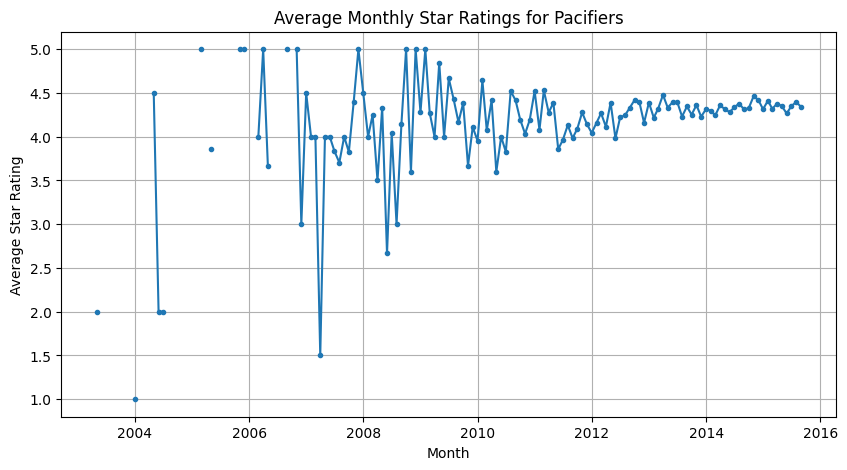

In [5]:
pacifier_data['review_date'] = pd.to_datetime(pacifier_data['review_date'])
pacifier_data.set_index('review_date', inplace=True)


monthly_ratings = pacifier_data['star_rating'].resample('M').mean()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(monthly_ratings.index, monthly_ratings, marker='.', linestyle='-')
plt.title('Average Monthly Star Ratings for Pacifiers')
plt.xlabel('Month')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()

In [6]:
monthly_ratings = pacifier_data['star_rating'].resample('M').mean()
print("Monthly Star Ratings Statistics:")
print("Mean:", monthly_ratings.mean())
print("Median:", monthly_ratings.median())
print("Standard Deviation:", monthly_ratings.std())


Monthly Star Ratings Statistics:
Mean: 4.138574395886818
Median: 4.274294670846395
Standard Deviation: 0.6434900657899282


2. Trend and Seasonality in Star Ratings

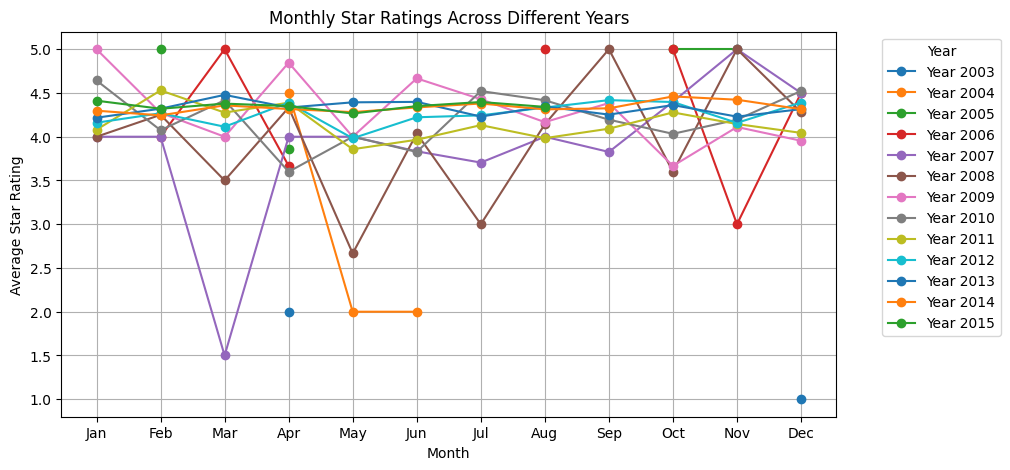

In [7]:
monthly_seasonal_ratings = pacifier_data['star_rating'].groupby([pacifier_data.index.month, pacifier_data.index.year]).mean().unstack()


plt.figure(figsize=(10, 5))
for year in monthly_seasonal_ratings.columns:
    plt.plot(monthly_seasonal_ratings.index, monthly_seasonal_ratings[year], marker='o', label=f'Year {year}')
plt.title('Monthly Star Ratings Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Star Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [8]:
monthly_seasonal_ratings = pacifier_data['star_rating'].groupby([pacifier_data.index.month, pacifier_data.index.year]).mean().unstack()
yearly_stats = monthly_seasonal_ratings.describe()
print("\nYearly Star Ratings Statistics:")
print(yearly_stats)


Yearly Star Ratings Statistics:
review_date      2003      2004      2005      2006       2007       2008  \
count        2.000000  3.000000  4.000000  7.000000  12.000000  12.000000   
mean         1.500000  2.833333  4.715909  4.309524   3.896997   3.984109   
std          0.707107  1.443376  0.568182  0.784270   0.835464   0.704415   
min          1.000000  2.000000  3.863636  3.000000   1.500000   2.666667   
25%          1.250000  2.000000  4.715909  3.833333   3.831522   3.575000   
50%          1.500000  2.000000  5.000000  4.500000   4.000000   4.089947   
75%          1.750000  3.250000  5.000000  5.000000   4.100000   4.292892   
max          2.000000  4.500000  5.000000  5.000000   5.000000   5.000000   

review_date       2009       2010       2011       2012       2013       2014  \
count        12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean          4.291434   4.203587   4.147604   4.256466   4.322972   4.337277   
std           0.393186   0.313

3. Helpfulness Ratio Analysis

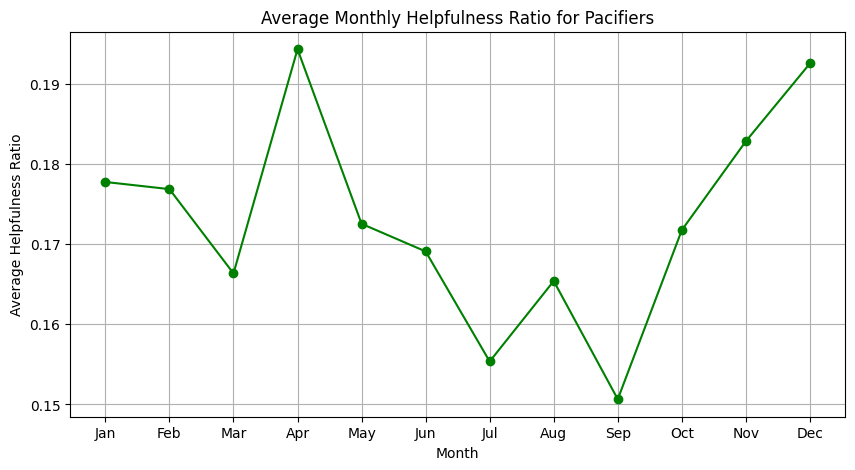

In [9]:
pacifier_data['helpfulness_ratio'] = pacifier_data['helpful_votes'] / pacifier_data['total_votes'].replace(0, 1)  # Avoid division by zero


helpfulness_by_month = pacifier_data['helpfulness_ratio'].groupby(pacifier_data.index.month).mean()


plt.figure(figsize=(10, 5))
plt.plot(helpfulness_by_month.index, helpfulness_by_month, marker='o', linestyle='-', color='green')
plt.title('Average Monthly Helpfulness Ratio for Pacifiers')
plt.xlabel('Month')
plt.ylabel('Average Helpfulness Ratio')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [10]:
pacifier_data['helpfulness_ratio'] = pacifier_data['helpful_votes'] / pacifier_data['total_votes'].replace(0, 1)  # Avoid division by zero
helpfulness_by_month = pacifier_data['helpfulness_ratio'].groupby(pacifier_data.index.month).mean()
helpfulness_stats = helpfulness_by_month.describe()
print("\nMonthly Helpfulness Ratio Statistics:")
print(helpfulness_stats)


Monthly Helpfulness Ratio Statistics:
count    12.000000
mean      0.172986
std       0.013164
min       0.150647
25%       0.166131
50%       0.172175
75%       0.179066
max       0.194383
Name: helpfulness_ratio, dtype: float64


4. Correlation Analysis

1. Correlation Between Star Ratings and Helpfulness Votes

Correlation between Star Rating and Helpful Votes: -0.07007627210705487


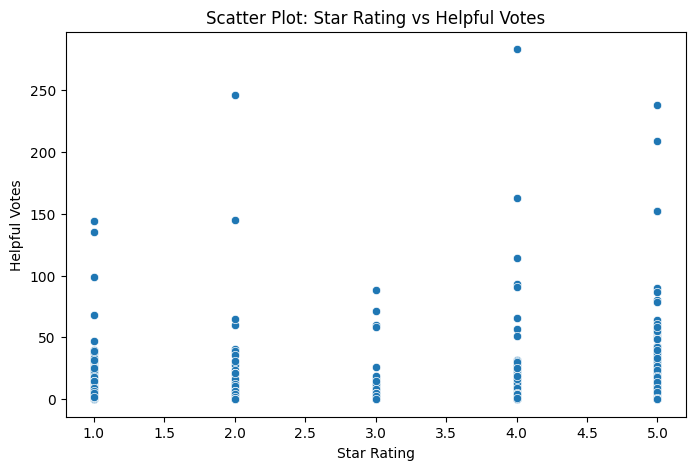

In [11]:
corr_star_helpful = pacifier_data['star_rating'].corr(pacifier_data['helpful_votes'])
print("Correlation between Star Rating and Helpful Votes:", corr_star_helpful)


plt.figure(figsize=(8, 5))
sns.scatterplot(x='star_rating', y='helpful_votes', data=pacifier_data)
plt.title('Scatter Plot: Star Rating vs Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.show()

2. Correlation Between Star Ratings and Total Votes

Correlation between Star Rating and Total Votes: -0.10766087843857547


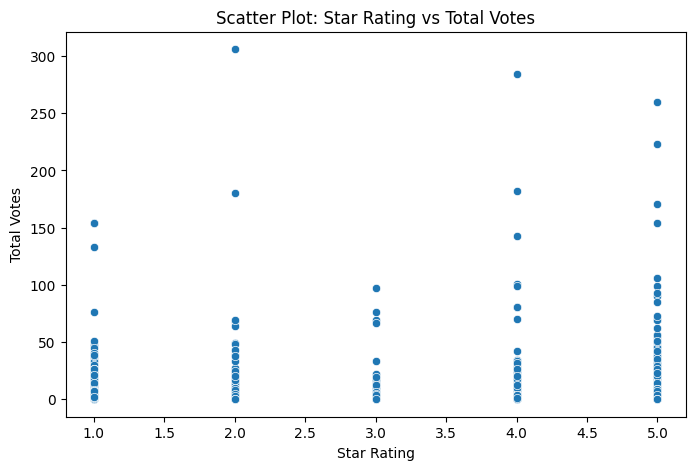

In [12]:
corr_star_total = pacifier_data['star_rating'].corr(pacifier_data['total_votes'])
print("Correlation between Star Rating and Total Votes:", corr_star_total)


plt.figure(figsize=(8, 5))
sns.scatterplot(x='star_rating', y='total_votes', data=pacifier_data)
plt.title('Scatter Plot: Star Rating vs Total Votes')
plt.xlabel('Star Rating')
plt.ylabel('Total Votes')
plt.show()

3. Correlation Between Helpfulness Ratio and Star Ratings

Correlation between Helpfulness Ratio and Star Rating: -0.14010341416137934


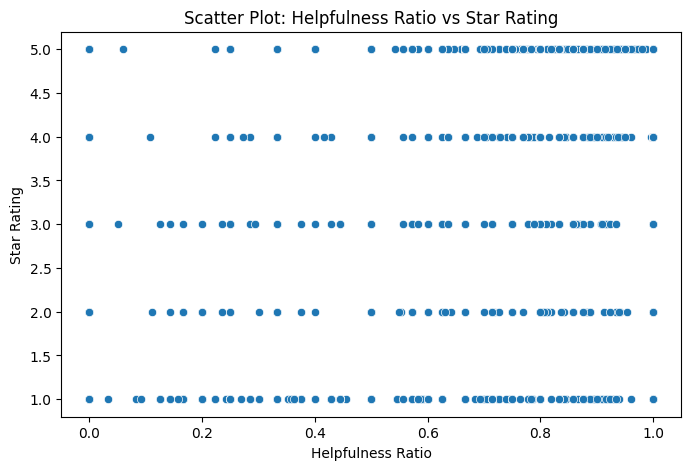

In [13]:
pacifier_data['helpfulness_ratio'] = pacifier_data['helpful_votes'] / pacifier_data['total_votes'].replace(0, 1)


corr_helpfulness_star = pacifier_data['helpfulness_ratio'].corr(pacifier_data['star_rating'])
print("Correlation between Helpfulness Ratio and Star Rating:", corr_helpfulness_star)


plt.figure(figsize=(8, 5))
sns.scatterplot(x='helpfulness_ratio', y='star_rating', data=pacifier_data)
plt.title('Scatter Plot: Helpfulness Ratio vs Star Rating')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Star Rating')
plt.show()


4. Heatmap of Correlation Matrix

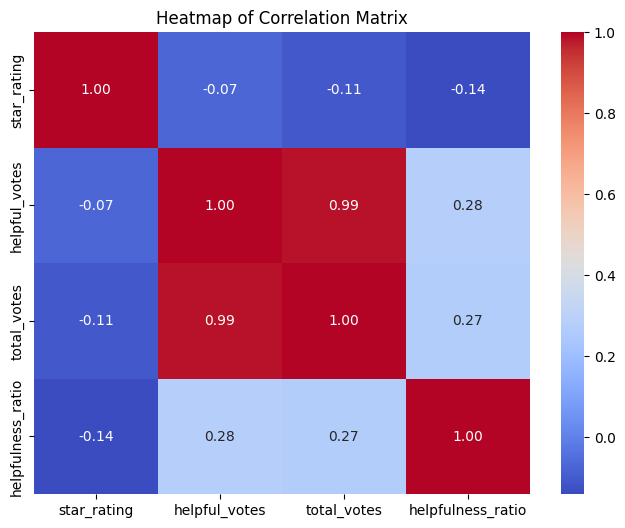

In [14]:
corr_matrix = pacifier_data[['star_rating', 'helpful_votes', 'total_votes', 'helpfulness_ratio']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [15]:
correlation_matrix = pacifier_data[['star_rating', 'helpful_votes', 'total_votes', 'helpfulness_ratio']].corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
                    star_rating  helpful_votes  total_votes  helpfulness_ratio
star_rating           1.000000      -0.070076    -0.107661          -0.140103
helpful_votes        -0.070076       1.000000     0.985436           0.279186
total_votes          -0.107661       0.985436     1.000000           0.272579
helpfulness_ratio    -0.140103       0.279186     0.272579           1.000000


Sentiment Analysis of Reviews on Pacifiers

In [17]:
pacifier_data['review_body'] = pacifier_data['review_body'].astype(str)  # Convert all entries to strings

Tokenization and Filtering

In [20]:
def tokenize(text):
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens


pacifier_data['tokens'] = pacifier_data['review_body'].apply(lambda x: tokenize(str(x)))

Sentiment Scores Using TextBlob

Calculate and Visualize Polarity Scores

In [25]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity


pacifier_data['polarity'] = pacifier_data['review_body'].apply(get_polarity)



polarity_stats = pacifier_data['polarity'].describe()
print("Polarity Statistics:\n", polarity_stats)


Polarity Statistics:
 count    18939.000000
mean         0.281856
std          0.281077
min         -1.000000
25%          0.093750
50%          0.250000
75%          0.446302
max          1.000000
Name: polarity, dtype: float64


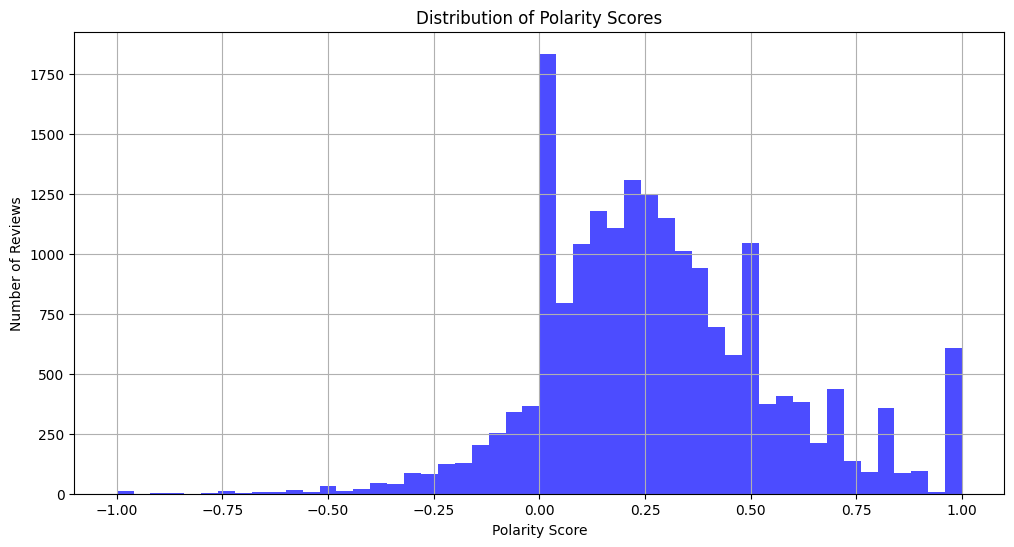

In [26]:
plt.figure(figsize=(12, 6))
plt.hist(pacifier_data['polarity'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

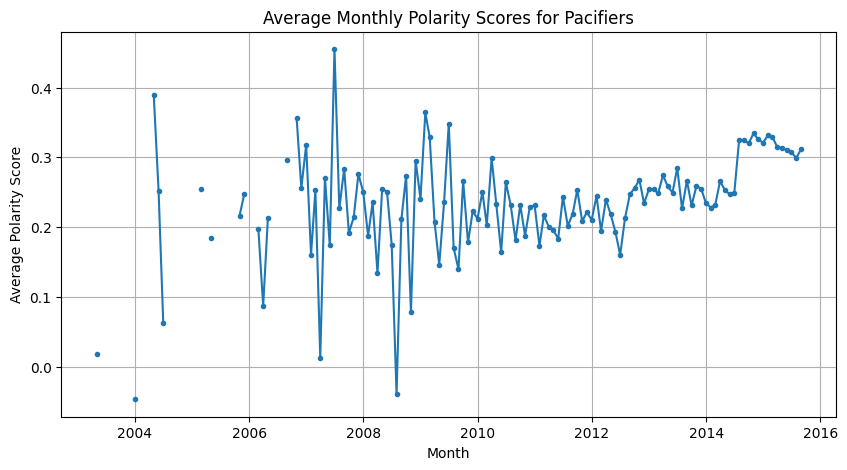

In [23]:

monthly_polarity = pacifier_data['polarity'].resample('M').mean()


plt.figure(figsize=(10, 5))
plt.plot(monthly_polarity.index, monthly_polarity, marker='.', linestyle='-')
plt.title('Average Monthly Polarity Scores for Pacifiers')
plt.xlabel('Month')
plt.ylabel('Average Polarity Score')
plt.grid(True)
plt.show()


Calculate and Visualize Subjectivity Scores

In [27]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


pacifier_data['subjectivity'] = pacifier_data['review_body'].apply(get_subjectivity)



subjectivity_stats = pacifier_data['subjectivity'].describe()
print("Subjectivity Statistics:\n", subjectivity_stats)

Subjectivity Statistics:
 count    18939.000000
mean         0.558291
std          0.224791
min          0.000000
25%          0.450000
50%          0.566667
75%          0.687500
max          1.000000
Name: subjectivity, dtype: float64


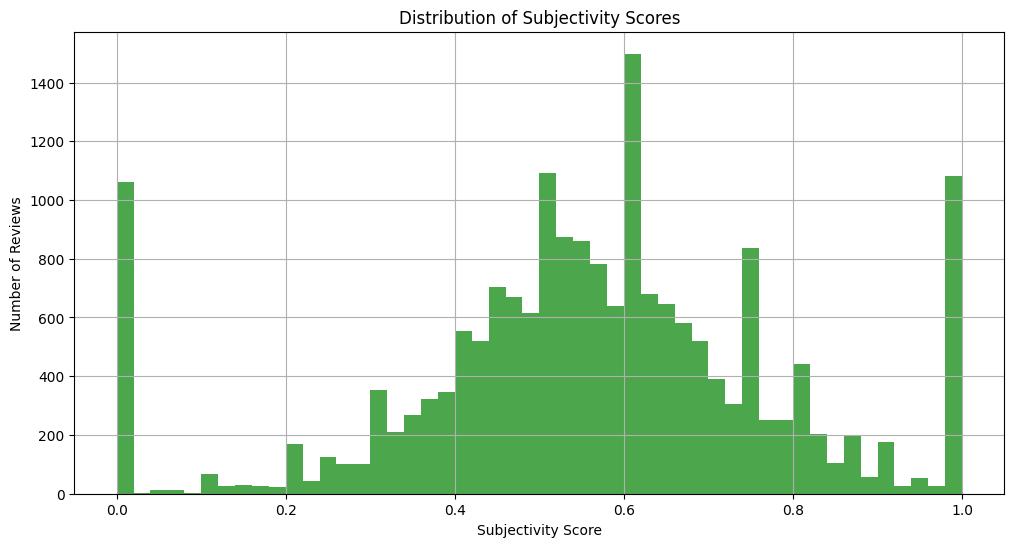

In [28]:

plt.figure(figsize=(12, 6))
plt.hist(pacifier_data['subjectivity'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

In [30]:

correlation_matrix = pacifier_data[['polarity', 'subjectivity', 'star_rating']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
               polarity  subjectivity  star_rating
polarity      1.000000      0.485885     0.389829
subjectivity  0.485885      1.000000     0.141204
star_rating   0.389829      0.141204     1.000000


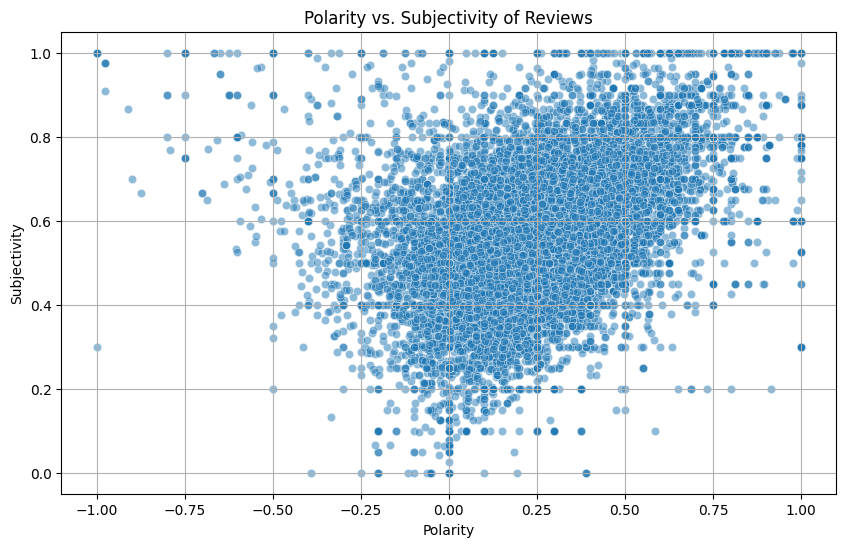

In [31]:
# Scatter plot of polarity vs subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity', y='subjectivity', data=pacifier_data, alpha=0.5)
plt.title('Polarity vs. Subjectivity of Reviews')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()


Most common words

In [43]:
all_tokens = sum(pacifier_data['review_body'].apply(tokenize).tolist(), [])

word_counts = Counter(all_tokens)

print("Top 20 most common words:\n", word_counts.most_common(20))

Top 20 most common words:
 [('baby', 6725), ('br', 5684), ('one', 5335), ('pacifier', 4780), ('great', 4281), ('like', 3825), ('would', 3816), ('love', 3807), ('pacifiers', 3068), ('use', 3048), ('little', 2935), ('loves', 2902), ('son', 2694), ('easy', 2476), ('daughter', 2465), ('product', 2459), ('get', 2399), ('old', 2229), ('well', 2216), ('good', 2117)]


Word Cloud

baby: 6725
br: 5684
one: 5335
pacifier: 4780
great: 4281
like: 3825
would: 3816
love: 3807
pacifiers: 3068
use: 3048
little: 2935
loves: 2902
son: 2694
easy: 2476
daughter: 2465
product: 2459
get: 2399
old: 2229
well: 2216
good: 2117


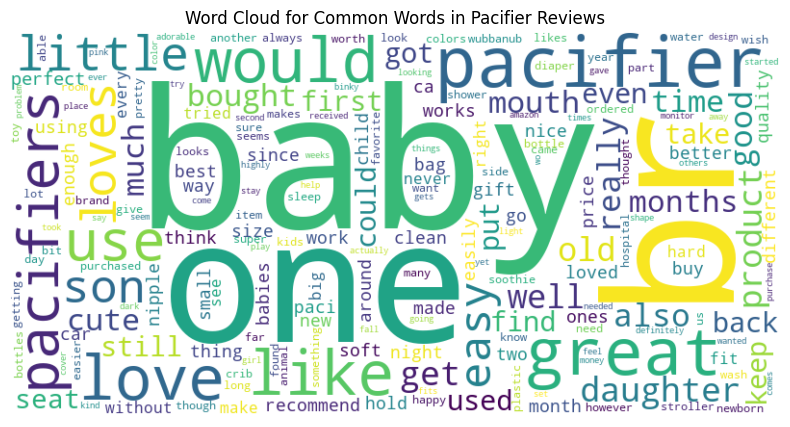

In [44]:
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Common Words in Pacifier Reviews')
plt.show()

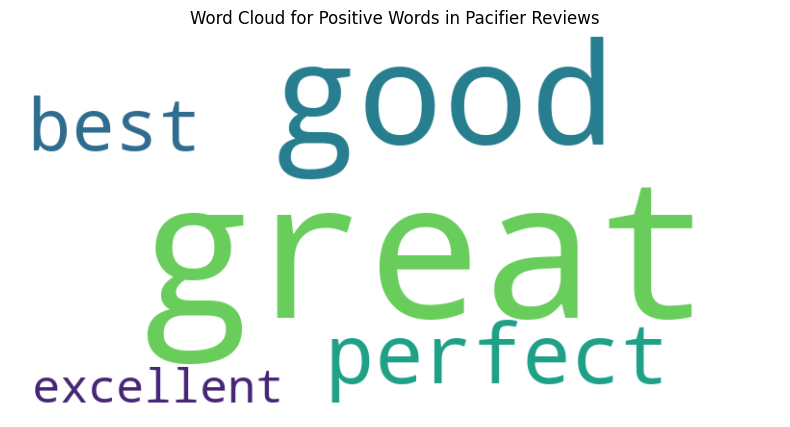

In [45]:
positive_words = {word: count for word, count in word_counts.items() if word in ['good', 'great', 'excellent', 'perfect', 'best']}

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Words in Pacifier Reviews')
plt.show()